In [443]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt


# ignore the columns with most null value  

In [444]:
tit = pd.read_csv('titanicTrain.csv')

In [445]:
# If in one row that all columns is null, we delete that row. 
tit = tit.dropna(axis=0, how='all')

In [446]:
columns = tit.columns

In [447]:
# ignore the columns with most null value
null_n = np.zeros(len(columns)).astype(np.int32)
for i,c in enumerate(columns):
    null_n[i] = tit[c].isnull().values.sum()
    print(c + ' : ' + str(null_n[i]))
drop_col = (null_n.argsort()[-4:][::-1])

pclass : 0
survived : 0
name : 0
sex : 0
age : 139
sibsp : 0
parch : 0
ticket : 0
fare : 0
cabin : 717
embarked : 2
boat : 583
body : 905
home.dest : 258


In [448]:
for dc in drop_col:
    tit = tit.drop(columns[dc], axis = 1)

In [449]:
#把剩下的少許有缺漏值的row刪除
tit = tit.dropna(axis=0, how='any')

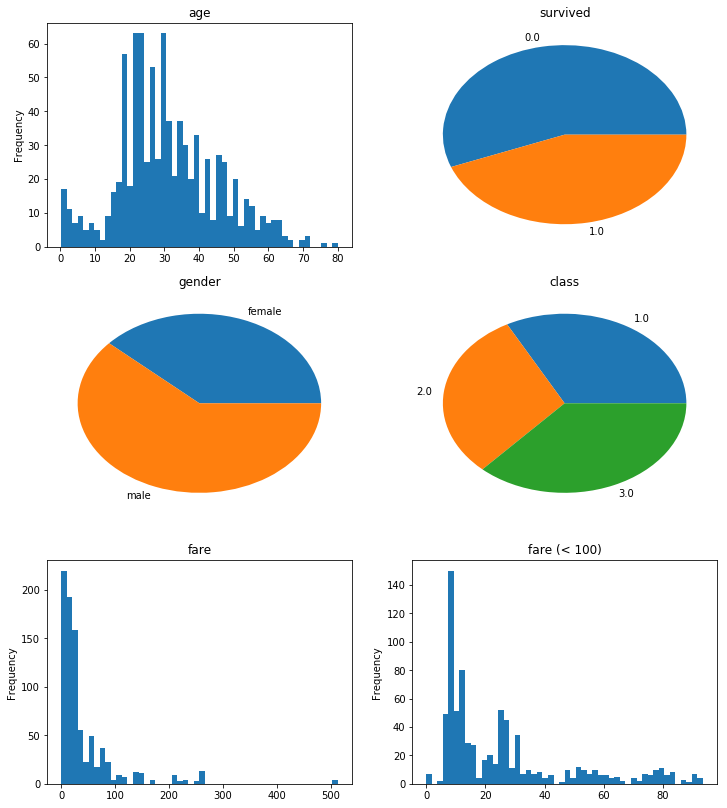

In [450]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(12, 14))
tit.age.plot.hist(bins=50, title='age', ax=axs[0, 0])
tit.groupby('survived').agg('count')['age'].plot.pie(title='survived', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
tit.groupby('sex').agg('count')['age'].plot.pie(title='gender', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
tit.groupby('pclass').agg('count')['age'].plot.pie(title='class', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
fare = tit.fare
fare.plot.hist(bins=50, title='fare', ax=axs[2, 0])
fare[fare < 100].plot.hist(bins=50, title='fare (< 100)', ax=axs[2, 1])
plt.show()

In [451]:
tit['child'] = tit.apply(lambda row: 1 if row['age'] < 15 else 0, axis=1)

In [452]:
sex_group = tit[['sex', 'survived']].groupby('sex')
sex_agg = sex_group.agg(['sum', 'count'])['survived']
print(sex_agg)
sex_agg['per'] = sex_agg['sum']/sex_agg['count']
print(sex_agg)

          sum  count
sex                 
female  264.0    329
male    115.0    530
          sum  count       per
sex                           
female  264.0    329  0.802432
male    115.0    530  0.216981


In [453]:
child_group = tit[['child', 'survived']].groupby('child')
child_agg = child_group.agg(['sum', 'count'])['survived']
print(child_agg)
child_agg['per'] = child_agg['sum']/child_agg['count']
print(child_agg)

         sum  count
child              
0      329.0    787
1       50.0     72
         sum  count       per
child                        
0      329.0    787  0.418043
1       50.0     72  0.694444


In [454]:
pclass_group = tit[['pclass', 'survived']].groupby('pclass')
pclass_agg = pclass_group.agg(['sum', 'count'])['survived']
print(pclass_agg)
pclass_agg['per'] = pclass_agg['sum']/pclass_agg['count']
print(pclass_agg)

          sum  count
pclass              
1.0     179.0    282
2.0     115.0    261
3.0      85.0    316
          sum  count       per
pclass                        
1.0     179.0    282  0.634752
2.0     115.0    261  0.440613
3.0      85.0    316  0.268987


In [455]:
parch_group = tit[['parch', 'survived']].groupby('parch')
parch_agg = parch_group.agg(['sum', 'count'])['survived']
print(parch_agg)
parch_agg['per'] = parch_agg['sum']/parch_agg['count']
print(parch_agg)

         sum  count
parch              
0.0    236.0    633
1.0     84.0    125
2.0     52.0     85
3.0      5.0      8
4.0      1.0      2
5.0      1.0      4
6.0      0.0      2
         sum  count       per
parch                        
0.0    236.0    633  0.372828
1.0     84.0    125  0.672000
2.0     52.0     85  0.611765
3.0      5.0      8  0.625000
4.0      1.0      2  0.500000
5.0      1.0      4  0.250000
6.0      0.0      2  0.000000


In [456]:
sibsp_group = tit[['sibsp', 'survived']].groupby('sibsp')
sibsp_agg = sibsp_group.agg(['sum', 'count'])['survived']
print(sibsp_agg)
sibsp_agg['per'] = sibsp_agg['sum']/sibsp_agg['count']
print(sibsp_agg)

         sum  count
sibsp              
0.0    219.0    552
1.0    135.0    248
2.0     16.0     34
3.0      6.0      7
4.0      3.0     12
5.0      0.0      6
         sum  count       per
sibsp                        
0.0    219.0    552  0.396739
1.0    135.0    248  0.544355
2.0     16.0     34  0.470588
3.0      6.0      7  0.857143
4.0      3.0     12  0.250000
5.0      0.0      6  0.000000


In [457]:
embarked_group = tit[['embarked', 'survived']].groupby('embarked')
embarked_agg = embarked_group.agg(['sum', 'count'])['survived']
print(embarked_agg)
embarked_agg['per'] = embarked_agg['sum']/embarked_agg['count']
print(embarked_agg)

            sum  count
embarked              
C         118.0    189
Q          11.0     41
S         250.0    629
            sum  count       per
embarked                        
C         118.0    189  0.624339
Q          11.0     41  0.268293
S         250.0    629  0.397456


### As we can see, [sex, pclass, parch, sibsp, age, child, embarked] is meaningful. 

In [458]:
# Set a function to change embark string to number
def embark2n(e):
    if e == 'S':
        return 0
    elif e == 'C':
        return 1
    else:
        return 2

In [459]:
# Make the sex and embark to represented by number.
tit['sex_n'] = tit['sex'].apply(lambda x: 0 if x =='male' else 1)
tit['embarked_n'] = tit['embarked'].apply(embark2n)
# Drop the old sex and embark columns
tit.drop('sex', axis=1)
tit.drop('embarked', axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,child,sex_n,embarked_n
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,0,1,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,1,0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,1,1,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,0,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,0,1,0
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,0,0,0
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,0,1,0
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,0,0,0
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,0,1,0
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,0,0,1


In [460]:
# Use columns we think is meanful to train.
use_col = ['sex_n', 'pclass', 'parch', 'sibsp', 'age', 'child', 'embarked_n']

In [461]:
X = tit[use_col].as_matrix()
y = tit['survived'].as_matrix()

In [462]:
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing
preprocessed_X = preprocessing.normalize(preprocessing.scale(X))
print(preprocessed_X.shape)

(859, 7)


In [463]:
# Split the data to train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.33, random_state=42)

### PCA

In [464]:
my_pca = PCA(n_components=2)

#missing feature scaling and normalization
my_pca.fit(X_train)
train_X_PCA = my_pca.transform(X_train)
test_X_PCA = my_pca.transform(X_test)

### SGDClassifier

In [465]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(train_X_PCA, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [466]:
predict_y = clf.predict(test_X_PCA)
acc = (y_test == predict_y).mean()
print(acc)

0.7570422535211268


## The first try with using of PCA, we got 72%

In [467]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
acc = (y_test == predict_y).mean()
print(acc)

0.7605633802816901


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## The first try that didn't use PCA we got 77%
### Actually, at the beginning, we don't have many use_column, we don't think we need to use PCA

# Second try

In [468]:
tit = pd.read_csv('titanicTrain.csv')
Q_tit = pd.read_csv('titanicQuestion.csv')

In [469]:
tit = tit.dropna(axis=0, how='all')
print( 'total row : ', len(tit))

total row :  1000


In [470]:
columns = tit.columns
# ignore the columns with most null value
null_n = np.zeros(len(columns)).astype(np.int32)
for i,c in enumerate(columns):
    null_n[i] = tit[c].isnull().values.sum()
    print(c + ' : ' + str(null_n[i]))
drop_col = (null_n.argsort()[-4:][::-1])

pclass : 0
survived : 0
name : 0
sex : 0
age : 139
sibsp : 0
parch : 0
ticket : 0
fare : 0
cabin : 717
embarked : 2
boat : 583
body : 905
home.dest : 258


In [471]:
#List the number of null value in Question_titanic.
Q_columns = Q_tit.columns
Q_null_n = np.zeros(len(Q_columns)).astype(np.int32)
for i,c in enumerate(Q_columns):
    Q_null_n[i] = Q_tit[c].isnull().values.sum()
    print(c + ' : ' + str(Q_null_n[i]))

pclass : 0
survived : 309
name : 0
sex : 0
age : 124
sibsp : 0
parch : 0
ticket : 0
fare : 1
cabin : 297
embarked : 0
boat : 240
body : 283
home.dest : 306


In [472]:
tit_suv = tit[tit['survived']==1.0]
tit_dead = tit[tit['survived']==0.0]

print("suv : ", len(tit_suv))
print("dead : ", len(tit_dead))

suv :  423
dead :  577


### find that body only have 95 data, so ignore body.
### Also, ignore name.

In [473]:
tit = tit.drop(['body', 'name'], axis=1)
Q_tit = Q_tit.drop(['body', 'name'], axis=1)
columns = tit.columns
Q_columns = Q_tit.columns

In [474]:
import math
def home2sim(x):
    x = str(x)
    if(x == 'nan'):
        return ''
    x = x.split(',')
    return x[-1]
#Get the Bigger region tag
tit['home'] = tit['home.dest'].apply(home2sim)
Q_tit['home'] = Q_tit['home.dest'].apply(home2sim)

In [475]:
def plot_kde(title, feature, xmin=0, xmax=None):
    fig, ax = plt.subplots(1,1)
    tit_suv[feature].plot.kde(ax=ax, color='g')
    tit_dead[feature].plot.kde(ax=ax, color='r')
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    plt.show()

### figure out whether age, fare are useful

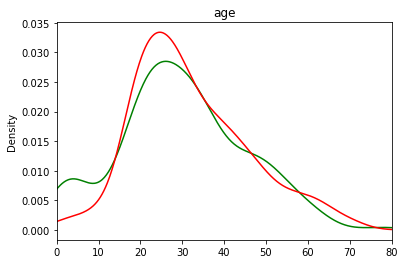

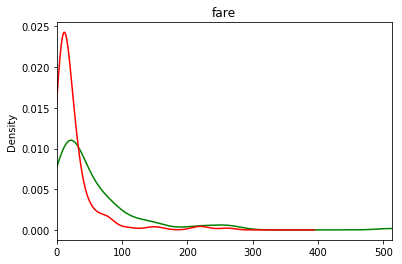

In [476]:
tit_suv = tit[tit['survived']==1.0]
tit_dead = tit[tit['survived']==0.0]

plot_kde('age', 'age', xmax=tit.age.max())
plot_kde('fare', 'fare', xmax=tit.fare.max())


In [477]:
def pie_plot(labels, sizes, title):
    plt.figure(figsize=(6,9)) 
    patches,text1,text2 = plt.pie(sizes,
                          labels=labels,
                          autopct = '%3.2f%%',
                          shadow = False, 
                          startangle =90, 
                          pctdistance = 0.6) 

    plt.axis('equal')
    plt.title(title)
    plt.show()

## As we can see, people who pay high fare have a high probablity to survive.

## Survive posibility according to boat column

Index(['4', '15', '14', '10', '13', '5', '3', '7', '11', '8', '9', '6', 'C',
       '12', 'D', '2', '16', 'A', 'B', '1', '5 7', 'C D', '13 15 B', '15 16',
       '8 10', '5 9'],
      dtype='object')
Index(['4', '15', '14', '10', '13', '5', '3', '7', '11', '8', '9', '6', 'C',
       '12', 'D', '2', '16', 'A', 'B', '1'],
      dtype='object')


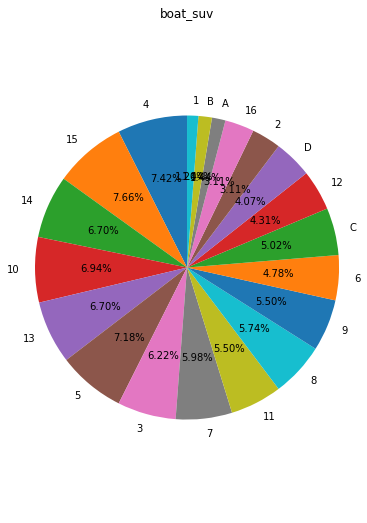

In [478]:
boat_suv_count = tit_suv['boat'].value_counts()
boat_suv_index = boat_suv_count.index
print(boat_suv_count.index)

# 處理坐超過一隻船的資料
for i in boat_suv_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            boat_suv_count[si] += boat_suv_count[i]
        boat_suv_count = boat_suv_count.drop([i])

boat_suv_index = boat_suv_count.index
print(boat_suv_count.index)
pie_plot(boat_suv_index, boat_suv_count, 'boat_suv')


Index(['A', 'D', '12', 'B', '14'], dtype='object')
Index(['A', 'D', '12', 'B', '14'], dtype='object')


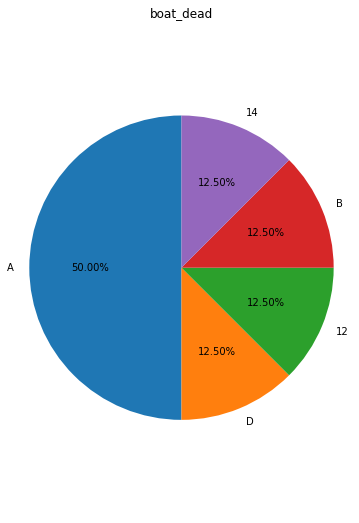

In [479]:
boat_dead_count = tit_dead['boat'].value_counts()
boat_dead_index = boat_dead_count.index
print(boat_dead_count.index)

# 處理坐超過一隻船的資料
for i in boat_dead_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            boat_dead_count[si] += boat_dead_count[i]
        boat_dead_count = boat_dead_count.drop([i])

boat_dead_index = boat_dead_count.index
print(boat_dead_count.index)
pie_plot(boat_dead_index, boat_dead_count, 'boat_dead')


suvival rate:


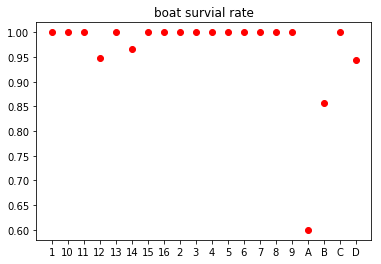

In [480]:
bdi = boat_dead_index
for bsi in (boat_suv_index):
    if not bsi in bdi:
        boat_dead_count[bsi] = 0

print('suvival rate:')
boat_suv_rate = boat_suv_count / (boat_dead_count + boat_suv_count)
x = np.arange(len(boat_suv_rate.index))
plt.xticks(x, boat_suv_rate.index)
plt.plot(x, boat_suv_rate, 'ro')
plt.title('boat survial rate')
plt.show()

## This figure out that if someone who is on boat, he/she would have a high prosibility to suvive. Also, boat A is the exception.

In [481]:
# if nan, we suppose he/she would have 50 percent to survive. 
def boat2num(x):
    if(str(x) != 'nan' and str(x)!='NaN'):
        x = x.split(' ')
        avg = []
        for c in x:
            avg.append(boat_suv_rate[c])
        return np.array(avg).mean()
    
    return 0.4

In [482]:
tit['boat_num'] = tit['boat'].apply(boat2num)
Q_tit['boat_num'] = Q_tit['boat'].apply(boat2num)


## Check home

Index(['4', '15', '14', '10', '13', '5', '3', '7', '11', '8', '9', '6', 'C',
       '12', 'D', '2', '16', 'A', 'B', '1'],
      dtype='object')


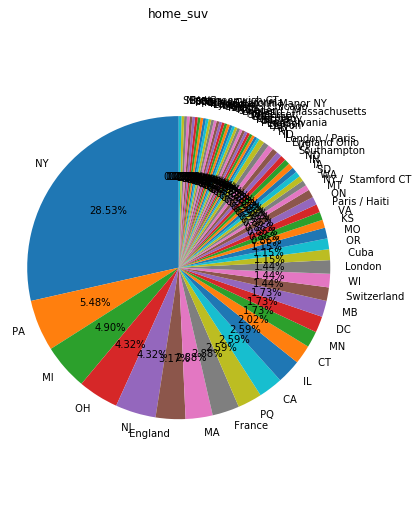

In [483]:
home_suv_count = tit_suv['home'].value_counts()
home_suv_count = home_suv_count.drop([''])
home_suv_index = home_suv_count.index
print(boat_suv_count.index)

pie_plot(home_suv_index, home_suv_count, 'home_suv')


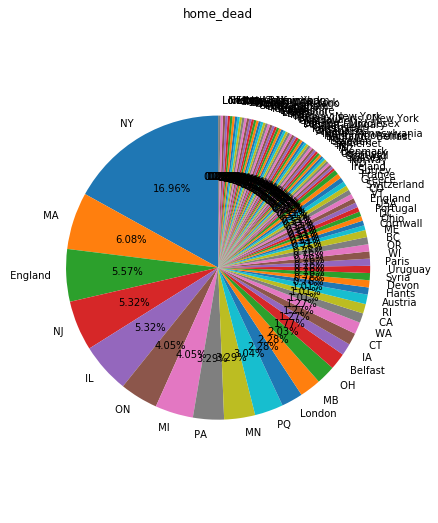

In [484]:
home_dead_count = tit_dead['home'].value_counts()
home_dead_count = home_dead_count.drop([''])
home_dead_index = home_dead_count.index

pie_plot(home_dead_index, home_dead_count, 'home_dead')


suvival rate:


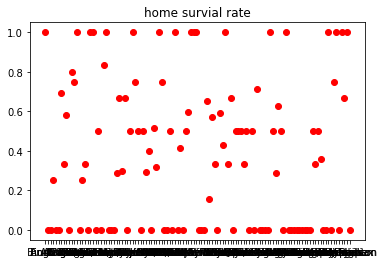

In [485]:
for hsi in (home_suv_index):
    if not hsi in home_dead_index:
        home_dead_count[hsi] = 0
home_dead_index = home_dead_count.index
for hdi in (home_dead_index):
    if not hdi in home_suv_index:
        home_suv_count[hdi] = 0

home_suv_index = home_suv_count.index

print('suvival rate:')
home_suv_rate = home_suv_count / (home_dead_count + home_suv_count)

x = np.arange(len(home_suv_rate.index))
plt.xticks(x, home_suv_rate.index)
plt.plot(x, home_suv_rate, 'ro')
plt.title('home survial rate')
plt.show()

## This figure illustrate that home is also a key point.

In [486]:
# if nan, we suppose he/she would have 50 percent to survive. 
def home2num(x):
    if(len(x) > 0):
        return home_suv_rate[x]
    
    return 0.4

In [487]:
tit['home_num'] = tit['home'].apply(home2num)
Q_tit['home_num'] = Q_tit['home'].apply(home2num)

# check cabin

Index(['F33', 'B96 B98', 'F4', 'C23 C25 C27', 'B57 B59 B63 B66', 'E101',
       'C101', 'A34', 'E34', 'C78',
       ...
       'B79', 'E45', 'B78', 'B26', 'B61', 'B50', 'E36', 'E68', 'C90', 'A31'],
      dtype='object', length=125)
Index(['F33', 'F4', 'E101', 'C101', 'A34', 'E34', 'C78', 'E33', 'C93', 'E24',
       ...
       'E39', 'E41', 'B52', 'B54', 'B56', 'C22', 'C26', 'F', 'G63', 'E57'],
      dtype='object', length=141)


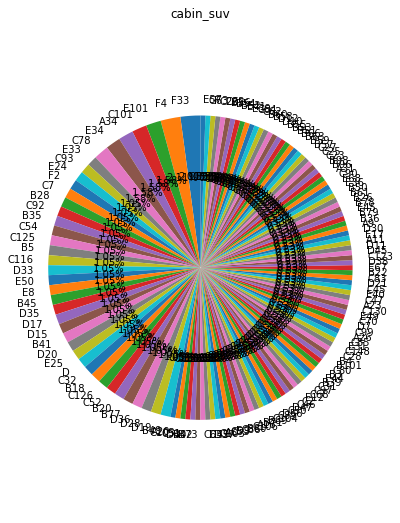

In [488]:
cabin_suv_count = tit_suv['cabin'].value_counts()
cabin_suv_index = cabin_suv_count.index
print(cabin_suv_count.index)

# 處理坐超過一隻船的資料
for i in cabin_suv_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            if si in cabin_suv_index:
                cabin_suv_count[si] += cabin_suv_count[i]
            else: 
                cabin_suv_count[si] = 1
        cabin_suv_count = cabin_suv_count.drop([i])

cabin_suv_index = cabin_suv_count.index
print(cabin_suv_count.index)
pie_plot(cabin_suv_index, cabin_suv_count, 'cabin_suv')


Index(['C22 C26', 'C23 C25 C27', 'C124', 'E46', 'D', 'D26', 'C6', 'C55 C57',
       'F2', 'B71', 'B94', 'B69', 'E67', 'D21', 'C83', 'B37', 'B22', 'D37',
       'A18', 'E44', 'A32', 'D22', 'E31', 'B11', 'B19', 'F E46', 'B24',
       'B51 B53 B55', 'C111', 'C91', 'C95', 'C85', 'A36', 'D43', 'A19', 'C86',
       'C82', 'B102', 'B30', 'C68', 'A5', 'B78', 'B86', 'A24', 'C118', 'C110',
       'B82 B84', 'C87', 'C132', 'F G63', 'E52', 'D46', 'B58 B60', 'C49',
       'E63', 'B57 B59 B63 B66', 'A10', 'C46', 'D50', 'E58', 'C65', 'C78',
       'C62 C64', 'C128', 'C30', 'A14', 'C123', 'D30', 'B38', 'C106', 'D34',
       'E60', 'B10', 'T', 'D6', 'C89', 'A21', 'C31', 'C39', 'C2', 'A7', 'F',
       'E77', 'A29', 'C80', 'D48', 'E38'],
      dtype='object')
Index(['C124', 'E46', 'D', 'D26', 'C6', 'F2', 'B71', 'B94', 'B69', 'E67',
       'D21', 'C83', 'B37', 'B22', 'D37', 'A18', 'E44', 'A32', 'D22', 'E31',
       'B11', 'B19', 'B24', 'C111', 'C91', 'C95', 'C85', 'A36', 'D43', 'A19',
       'C86', 'C82',

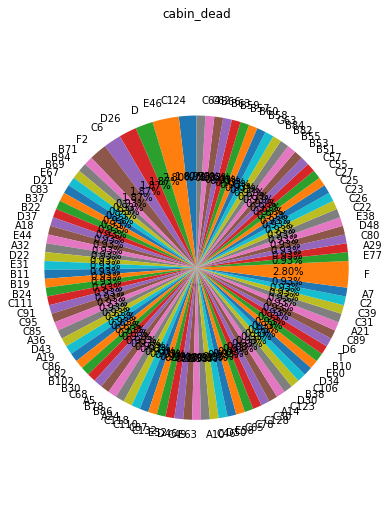

In [489]:
cabin_dead_count = tit_dead['cabin'].value_counts()
cabin_dead_index = cabin_dead_count.index
print(cabin_dead_count.index)

# 處理坐超過一隻船的資料
for i in cabin_dead_index:
    split_i = i.split(' ')

    if len(split_i)>1:
        for si in split_i:
            if si in cabin_dead_index:
                cabin_dead_count[si] += cabin_dead_count[i]
            else: 
                cabin_dead_count[si] = 1
        cabin_dead_count = cabin_dead_count.drop([i])

cabin_dead_index = cabin_dead_count.index
print(cabin_dead_count.index)
pie_plot(cabin_dead_index, cabin_dead_count, 'cabin_dead')


suvival rate:


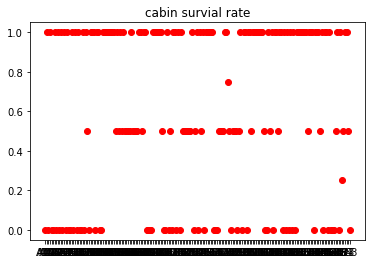

In [490]:
cdi = cabin_dead_index
for csi in (cabin_suv_index):
    if not csi in cdi:
        cabin_dead_count[csi] = 0

csi = cabin_suv_count.index
for cdi in (cabin_dead_count.index):
    if not cdi in csi:
        cabin_suv_count[cdi] = 0

print('suvival rate:')
cabin_suv_rate = cabin_suv_count / (cabin_dead_count + cabin_suv_count)
x = np.arange(len(cabin_suv_rate.index))
plt.xticks(x, cabin_suv_rate.index)
plt.plot(x, cabin_suv_rate, 'ro')
plt.title('cabin survial rate')
plt.show()

In [491]:
# if nan, we suppose he/she would have 50 percent to survive. 
def cabin2num(x):
    if(str(x) != 'nan' and str(x)!='NaN' and str(x) in cabin_suv_rate):
        x = x.split(' ')
        avg = []
        for c in x:
            avg.append(cabin_suv_rate[c])
        return np.array(avg).mean()
    
    return 0.5

In [492]:
tit['cabin_num'] = tit['cabin'].apply(cabin2num)
Q_tit['cabin_num'] = Q_tit['cabin'].apply(cabin2num)

In [493]:
def embark2n(e):
    if e == 'S':
        return 0
    elif e == 'C':
        return 1
    else:
        return 2
    
tit['sex_n'] = tit['sex'].apply(lambda x: 0 if x =='male' else 1)
tit['embarked_n'] = tit['embarked'].apply(embark2n)
Q_tit['sex_n'] = Q_tit['sex'].apply(lambda x: 0 if x =='male' else 1)
Q_tit['embarked_n'] = Q_tit['embarked'].apply(embark2n)

In [494]:
age_average = tit['age'].mean()
tit['age'] = tit['age'].apply(lambda x: age_average if (x == float('nan') or str(x)=='NaN' or str(x)=='nan') else x)

# drop col

In [495]:
drop_col = ['sex', 'ticket', 'cabin', 'boat', 'home.dest', 'home', 'embarked']
for dc in drop_col:
    tit = tit.drop(dc, axis=1)
    Q_tit = Q_tit.drop(dc, axis=1)
Q_tit = Q_tit.drop(['survived'], axis = 1)

In [496]:
Q_tit = Q_tit.fillna(tit['age'].mean())

In [497]:
tit['child'] = tit.apply(lambda row: 1 if row['age'] < 15 else 0, axis=1)
Q_tit['child'] = Q_tit.apply(lambda row: 1 if row['age'] < 15 else 0, axis=1)

# Training

In [498]:
all_col = tit.columns
use_col = all_col.drop("survived")
X = tit[use_col].as_matrix()
Q_X = Q_tit[use_col].as_matrix()
y = tit['survived'].as_matrix()
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing
preprocessed_X = preprocessing.normalize(preprocessing.scale(X))
preprocessed_Q_X = preprocessing.normalize(preprocessing.scale(Q_X))
print(preprocessed_X.shape)

(1000, 11)


In [499]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.33, random_state=42)

In [500]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
acc = (y_test == predict_y).mean()
print(acc)

0.9454545454545454


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [501]:
predict_Q_y = clf.predict(preprocessed_Q_X)
Q_tit['survived'] = predict_Q_y

In [502]:
Q_tit.to_csv('Ans_Titanic.csv')